Enter dataset values separated by commas (e.g. 1,2,3,4,5,6): 1,2,1,5,1,8,5,8,6,9
Enter number of clusters (default 2): 2


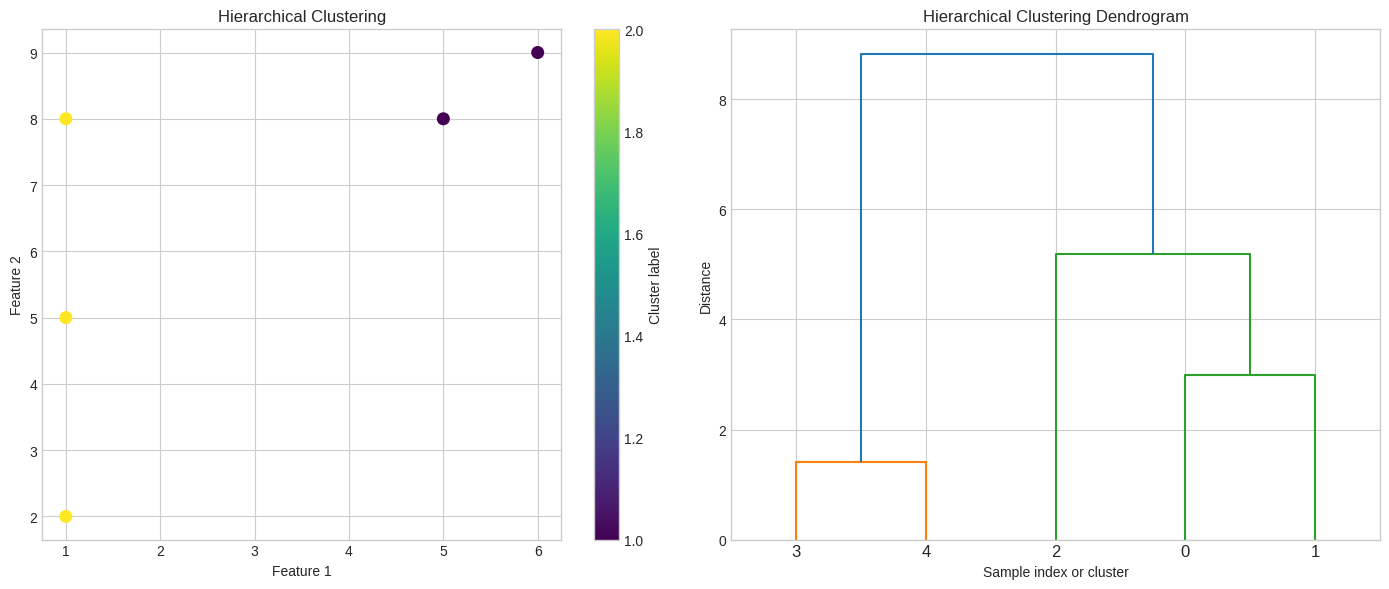

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

def get_float_list_from_input(prompt):
    while True:
        user_input = input(prompt)
        try:
            data = [float(i) for i in user_input.split(',')]
            if len(data) == 0:
                print("Please enter at least one number.")
                continue
            return np.array(data)
        except ValueError:
            print("Invalid input. Please enter numbers separated by commas.")

def get_int_from_input(prompt, default):
    user_input = input(prompt)
    if user_input.strip() == "":
        return default
    try:
        val = int(user_input)
        if val <= 0:
            print(f"Number of clusters must be positive. Using default {default}.")
            return default
        return val
    except ValueError:
        print(f"Invalid input. Using default {default}.")
        return default

def main():
    data = get_float_list_from_input("Enter dataset values separated by commas (e.g. 1,2,3,4,5,6): ")

    if len(data) % 2 == 0:
        X = data.reshape(-1, 2)
    else:
        X = data.reshape(-1, 1)
        print("Warning: Odd number of values, clustering on 1D data.")

    n_clusters = get_int_from_input("Enter number of clusters (default 2): ", 2)

    Z = linkage(X, method='ward')
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    if X.shape[1] >= 2:
        scatter = ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
        ax1.set_xlabel("Feature 1")
        ax1.set_ylabel("Feature 2")
    else:
        scatter = ax1.scatter(range(len(X)), X[:, 0], c=labels, cmap='viridis', s=70)
        ax1.set_xlabel("Sample index")
        ax1.set_ylabel("Feature 1")

    ax1.set_title("Hierarchical Clustering")
    plt.colorbar(scatter, ax=ax1, label="Cluster label")

    dendrogram(Z, truncate_mode='level', p=5, ax=ax2)
    ax2.set_title("Hierarchical Clustering Dendrogram")
    ax2.set_xlabel("Sample index or cluster")
    ax2.set_ylabel("Distance")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

def get_float_list_from_input(prompt):
    while True:
        user_input = input(prompt)
        try:
            data = [float(i) for i in user_input.split(',')]
            if len(data) == 0:
                print("Please enter at least one number.")
                continue
            return np.array(data)
        except ValueError:
            print("Invalid input. Please enter numbers separated by commas.")

def get_int_from_input(prompt, default):
    user_input = input(prompt)
    if user_input.strip() == "":
        return default
    try:
        val = int(user_input)
        if val <= 0:
            print(f"Number of clusters must be positive. Using default {default}.")
            return default
        return val
    except ValueError:
        print(f"Invalid input. Using default {default}.")
        return default

def main():
    data = get_float_list_from_input("Enter dataset values separated by commas (e.g. 1,2,3,4,5,6): ")

    if len(data) % 2 == 0:
        X = data.reshape(-1, 2)
    else:
        X = data.reshape(-1, 1)
        print("Warning: Odd number of values, clustering on 1D data.")

    n_clusters = get_int_from_input("Enter number of clusters (default 2): ", 2)

    Z = linkage(X, method='ward')
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')

    print("\n=== HIERARCHICAL CLUSTERING RESULTS ===")
    for i, label in enumerate(labels):
        print(f"Data Point {i + 1}: {X[i]} → Cluster {label}")

    print("\nTotal Clusters Formed:", n_clusters)

if __name__ == "__main__":
    main()
